In [3]:
import pandas as pd
df = pd.read_csv('car_prices.csv')
# sets df = the data

# replaces blank fields with NA then drops any line with NA
df_cleaned = df.replace('',pd.NA,inplace=True)
df_cleaned = df.dropna()
#df_cleaned.to_csv("cleaned_data.csv", index=False)
# data das been cleaned and put in cleaned_data.csv
print("Cleaned data has been saved to cleaned_data.csv")




Cleaned data has been saved to cleaned_data.csv


In [15]:
import pandas as pd
df = pd.read_csv('Cleaned_CarPrices.csv')

print(df.columns)

unique_makes =df['make'].unique()
print(unique_makes)

unique_condition =df['condition'].unique()
print(unique_condition)

unique_colors =df['saledate'].unique()
print(unique_colors)


Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')
['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Cadillac' 'Acura'
 'Lexus' 'Hyundai' 'Buick' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'Jaguar' 'Volkswagen' 'Toyota'
 'Subaru' 'Scion' 'Porsche' 'Dodge' 'FIAT' 'Chrysler' 'Ferrari' 'Honda'
 'GMC' 'Ram' 'smart' 'Bentley' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'Saab' 'Suzuki' 'Oldsmobile' 'Rolls-Royce' 'Isuzu' 'Plymouth'
 'Tesla' 'Aston Martin' 'Geo' 'Fisker' 'Daewoo' 'Lamborghini' 'Lotus']
[ 5. 45. 41. 43.  1. 34.  2. 42.  3. 48. 49. 17. 19. 29. 38. 44. 47. 32.
  4. 25. 37. 39. 31. 28. 46. 35. 26. 21. 36. 22. 27. 24. 33. 23. 16. 18.
 12. 14. 11. 13. 15.]
['Tue Dec 16 2014 12:30:00 GMT-0800 (PST)'
 'Thu Jan 15 2015 04:30:00 GMT-0800 (PST)'
 'Thu Jan 29 2015 04:30:00 GMT-08

In [ ]:
import pandas as pd
df = pd.read_csv('Cleaned_CarPrices.csv')

car_counts = df['make'].value_counts()
#print(car_counts)

car_colors = df['color'].value_counts()
print(car_colors)

car_seller = df['seller'].value_counts()
print(car_seller)


seller
ford motor credit company llc    17756
the hertz corporation            16286
nissan-infiniti lt               15777
santander consumer               14245
avis corporation                 11471
                                 ...  
scottsdale autos online llc          1
rally motorsports llc                1
zippy rent a car llc                 1
suburban chrysler jeep dodge         1
i -5 uhlmann rv                      1
Name: count, Length: 11923, dtype: int64


MMR stands for Manheim Market Report

MMR represents the price that the seller bought the car wholesale

while the selling price is the price that the car was sold for 

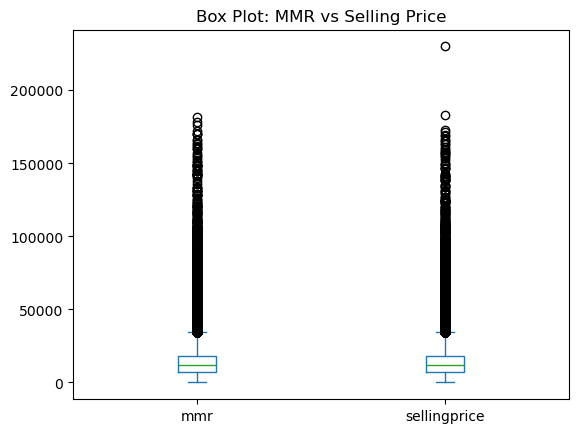

In [ ]:
# Compare MMR vs Selling Price 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Cleaned_CarPrices.csv')

# first create a box plot to see the ranges 

df[['mmr', 'sellingprice']].plot(kind='box')
plt.title('Box Plot: MMR vs Selling Price')
plt.show()



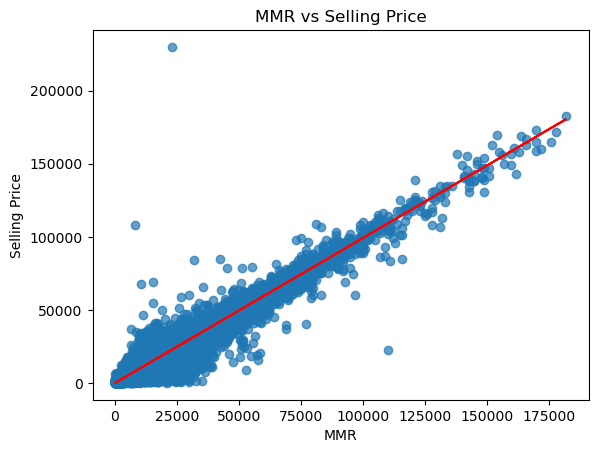

Correlation between MMR and Selling Price: 0.9834931745325861


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
df = pd.read_csv('Cleaned_CarPrices.csv')

plt.scatter(df['mmr'],df['sellingprice'],alpha=0.7)
plt.title('MMR vs Selling Price')
plt.xlabel('MMR')
plt.ylabel('Selling Price')

z = np.polyfit(df['mmr'], df['sellingprice'], 1)  # Linear fit
p = np.poly1d(z)
plt.plot(df['mmr'], p(df['mmr']), color='red', linestyle='-')

plt.show()

correlation = df['mmr'].corr(df['sellingprice'])
print(f"Correlation between MMR and Selling Price: {correlation}")

From the correlation coefficent above we can see the the correlation is stronly positive, therfore using mmr is a good idea to figure out what price you should sell for 

After I decided that this would be good for a linear regression the i decided to create an ml model 

Intercept: -33.50119286960944
Slope: 0.9918302211018648


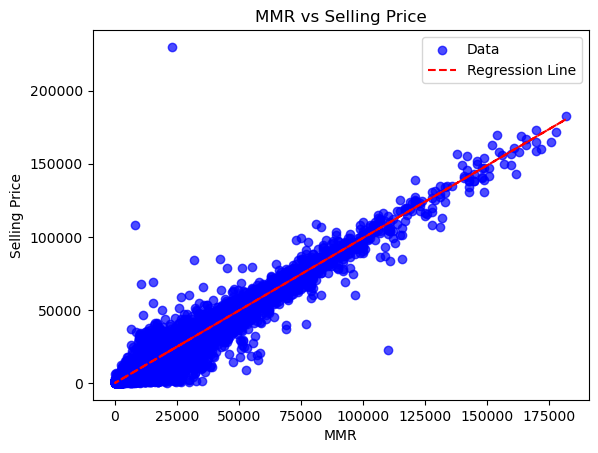

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
df = pd.read_csv('Cleaned_CarPrices.csv')

x = df['mmr'].values.reshape(-1,1)
# mmr is the input used to predict the selling price 
y = df['sellingprice'].values

# Linear Regression Model
model = LinearRegression()
model.fit(x,y)

print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

# Predicted Value
y_pred = model.predict(x)

plt.scatter(df['mmr'], df['sellingprice'],alpha=0.7, color='blue', label='Data')
# Plotted regression line
plt.plot(df['mmr'],y_pred,  color='red', linestyle='--', label='Regression Line')
plt.legend()
plt.title('MMR vs Selling Price')
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.show()

### Figure out the correlation to see what has the most effect on sale price

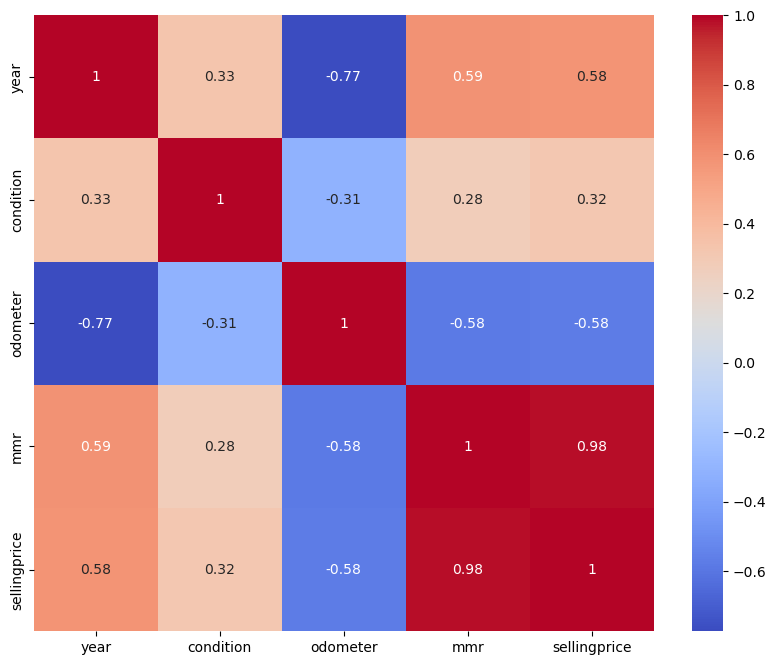

F-statistic: 2386.46, P-value: 0.0000
The effect of 'make' on selling price is statistically significant.


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway

df = pd.read_csv('Cleaned_CarPrices.csv')
df_numeric = df.select_dtypes(include=['int64','float64'])
correlation_matrix = df_numeric.corr()

# Visualized correlation
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


In [14]:
from scipy.stats import f_oneway
import pandas as pd

# Define categorical variables and the target variable
categorical_cols = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']
results = []

# Perform ANOVA for each categorical variable
for col in categorical_cols:
    groups = [group['sellingprice'] for _, group in df.groupby(col)]
    f_stat, p_value = f_oneway(*groups)
    results.append({'Variable': col, 'F-statistic': f_stat, 'P-value': p_value})

# Create a DataFrame for results
anova_results = pd.DataFrame(results)
anova_results['Significant'] = anova_results['P-value'] < 0.05  # Add significance flag
print(anova_results)




       Variable  F-statistic        P-value  Significant
0          make  2386.455943   0.000000e+00         True
1         model   578.619532   0.000000e+00         True
2          trim   225.215518   0.000000e+00         True
3          body   722.019048   0.000000e+00         True
4  transmission  1007.108100  8.760098e-221         True
5         state   735.333927   0.000000e+00         True
6         color  1139.467446   0.000000e+00         True
7      interior  1681.347195   0.000000e+00         True
8        seller    36.033278   0.000000e+00         True


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot p-values
plt.figure(figsize=(10, 6))
sns.barplot(
    data=anova_results.sort_values(by='P-value'), 
    x='P-value', 
    y='Variable', 
    palette='coolwarm', 
    hue='Significant'
)
plt.axvline(0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.title('P-values for Categorical Variables vs. Selling Price')
plt.xlabel('P-value')
plt.ylabel('Categorical Variable')
plt.legend(title='Significant')
plt.show()
